# Integrais de funções sem Antiderivada

Um ótimo exemplo é a integral
$$\int_0^2 {{{\mathop{\rm e}\nolimits} ^{ - {x^2}}}dx} $$

Para encontrar a área abaixo desta função sem antiderivada vamos aproximá-la por um polinômio de grau três, que passa pelos quatro pontos que a função ${{{\mathop{\rm e}\nolimits} ^{ - {x^2}}}}$.

Assim:
$${{\mathop{\rm e}\nolimits} ^{ - {x^2}}} = {p_3}\left( x \right) = {a_3}{x^3} + {a_2}{x^2} + {a_1}x + {a_0}$$
e as antiderivadas do polinômio são facilmente encontradas fazendo:
$$\int_0^2 {{{\mathop{\rm e}\nolimits} ^{ - {x^2}}}dx}  = \left[ {\frac{{{a_3}}}{4}{x^4} + \frac{{{a_2}}}{3}{x^3} + \frac{{{a_1}}}{2}{x^2} + {a_0}x} \right]_0^2$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Definindo os quatro pontos

In [13]:
x = np.linspace(0,2,4)
y = np.exp(-x**2)
print("Pontos a serem analizados:")
print("x= ",x)
print("y= ",y)

Pontos a serem analizados:
x=  [0.         0.66666667 1.33333333 2.        ]
y=  [1.         0.64118039 0.16901332 0.01831564]


Indicando os quatro pontos em um gráfico de dispersão

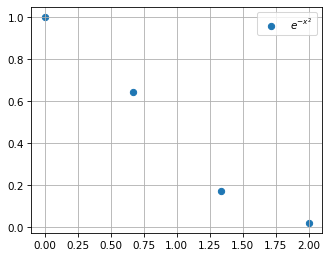

In [4]:
plt.figure(figsize=(5,4),dpi=75)
plt.scatter(x,y,label="$e^{-x^2}$")
plt.grid()
plt.legend()
plt.show()

Montando a matriz quadrada do sistema
$$\left[ {\begin{array}{*{20}{c}}
{x_1^3}&{x_1^2}&{x_1^{}}&1\\
{x_2^3}&{x_2^2}&{x_2^{}}&1\\
{x_3^3}&{x_3^2}&{x_3^{}}&1\\
{x_4^3}&{x_4^2}&{x_4^{}}&1
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
{{a_3}}\\
{{a_2}}\\
{{a_1}}\\
{{a_0}}
\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
{{y_4}}\\
{{y_3}}\\
{{y_2}}\\
{{y_1}}
\end{array}} \right]$$

In [6]:
quadrada = np.array([[x[0]**3,x[0]**2,x[0],1],
                     [x[1]**3,x[1]**2,x[1],1],
                     [x[2]**3,x[2]**2,x[2],1],
                     [x[3]**3,x[3]**2,x[3],1]                   
                     ])

Invertendo a matriz quadrada

In [7]:
inversa = np.linalg.inv(quadrada)
inversa

array([[-0.5625,  1.6875, -1.6875,  0.5625],
       [ 2.25  , -5.625 ,  4.5   , -1.125 ],
       [-2.75  ,  4.5   , -2.25  ,  0.5   ],
       [ 1.    ,  0.    ,  0.    ,  0.    ]])

In [8]:
b = np.transpose(y)

Calculando a matriz dos coeficientes $a_i$ do polinômio, pela expressão:
$$\left[ {\begin{array}{*{20}{c}}
{{a_3}}\\
{{a_2}}\\
{{a_1}}\\
{{a_0}}
\end{array}} \right] = {\left[ {\begin{array}{*{20}{c}}
{x_1^3}&{x_1^2}&{x_1^{}}&1\\
{x_2^3}&{x_2^2}&{x_2^{}}&1\\
{x_3^3}&{x_3^2}&{x_3^{}}&1\\
{x_4^3}&{x_4^2}&{x_4^{}}&1
\end{array}} \right]^{ - 1}}\left[ {\begin{array}{*{20}{c}}
{{y_4}}\\
{{y_3}}\\
{{y_2}}\\
{{y_1}}
\end{array}} \right]$$

In [9]:
aaa = np.matmul(inversa,b)
aaa

array([ 0.24458448, -0.61668486, -0.23581039,  1.        ])

Definindo vários pontos para verificar o quão perto da função ${{{\mathop{\rm e}\nolimits} ^{ - {x^2}}}}$ é do polinônio ${a_3}{x^3} + {a_2}{x^2} + {a_1}x + {a_0}$.

In [10]:
xx = np.linspace(0,2,100)

In [11]:
pol = aaa[0] * xx**3  +  aaa[1] * xx**2  +  aaa[2] * xx  +  aaa[3]

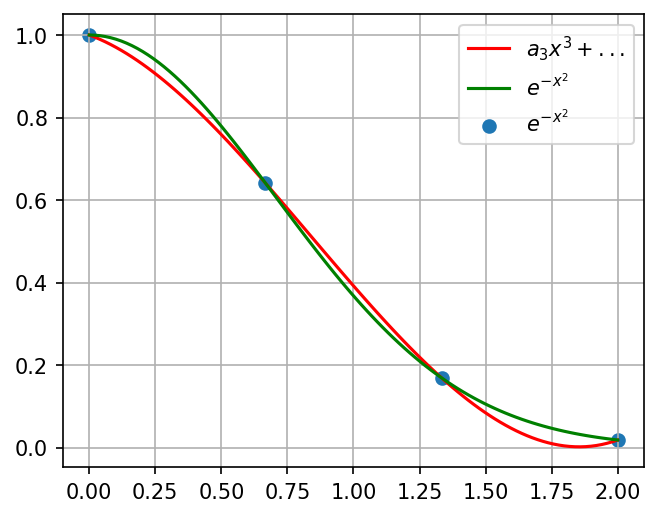

In [12]:
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(x,y,label="$e^{-x^2}$")
plt.plot(xx,pol,label="$a_3 x^3 + ...$",color='red')
plt.plot(xx,np.exp(-xx**2),label="$e^{-x^2}$",color='green')
plt.grid()
plt.legend()
plt.show()